## Red Wine Classification with XGBoost

This notebook demonstrates how to use XGBoost to predict the probability of a wine to be red.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's install the python library `shap` by Lundberg and Lee (2016) used to compute Shap Values. SHAP (SHapley Additive exPlanations) is a method to explain individual predictions. SHAP is based on the game theoretically optimal Shapley Values.

In [ ]:
# Shap must be installed via pip
!pip install shap

     |████████████████████████████████| 371 kB 9.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509240 sha256=8a69591185cf1b7f842c6849aabe620025c343a3f3592a497f4e289c1ccc17c4
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Read the data and store into a pandas.DataFrame
df = pd.read_csv('/content/drive/MyDrive/ca.webinars/Mastering Machine Learning/Episode 3/data/red_wine.txt')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


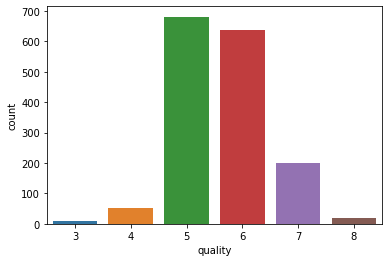

In [ ]:
sns.countplot(x=df['quality'], label='Count')
plt.show()

Let us separate the target variable from the set of features. Also, we define a new target as follows: all records of quality greater than 6 means 1, otherwise 0 - in a classification setting.

In [ ]:
y = df['quality']
y = y.apply(lambda x: 1 if x > 6 else 0)
X = df.drop(['quality'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
X_train.shape

(1279, 11)

In [ ]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [ ]:
y_train.shape

(1279,)

In [ ]:
import xgboost as xgb
import numpy as np

from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier



params = {
    'learning_rate': np.arange(0.01,0.1,0.01),
}

# Grid Search
cv = GridSearchCV(
    estimator = xgb.XGBClassifier(n_estimators = 1000, n_jobs=-1, seed=42), 
    param_grid = params, 
    scoring='roc_auc',
    n_jobs=-1, 
    cv=5, 
)
#Fit
cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=1000, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fals

In [ ]:
cv.best_params_

{'learning_rate': 0.01}

In [ ]:
cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [ ]:
best_model = cv.best_estimator_

Please note that we do not expect incredible performance of the model. Being a live session we want to reduce the fitting time, so please try by yourself to improve the quality of the model by tuning more hyperparameters.

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
y_pred_proba = best_model.predict_proba(X_test)

In [ ]:
y_pred_proba[0:3]

array([[0.9800488 , 0.01995124],
       [0.99635947, 0.00364056],
       [0.96653557, 0.0334644 ]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       273
           1       0.57      0.34      0.43        47

    accuracy                           0.87       320
   macro avg       0.73      0.65      0.68       320
weighted avg       0.85      0.87      0.85       320



## Explain Machine Learning Model Outputs with Shap Values!

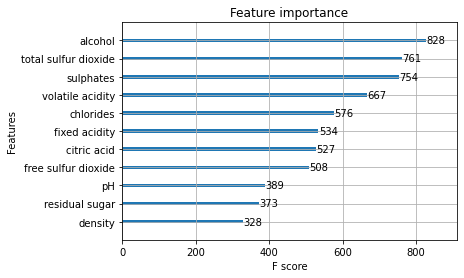

In [ ]:
xgb.plot_importance(best_model)
plt.show()

In [ ]:
import shap
# this might take a while depending on your dataset size! Here the data is small for illustration purposes
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[19, :], X_test.iloc[19,:])

In [ ]:
np.exp(-4.34)

0.013036528203437736

In [ ]:
y_pred_proba[18:20]

array([[0.15611506, 0.84388494],
       [0.99652183, 0.00347817]], dtype=float32)

### Feature Importance with Shap

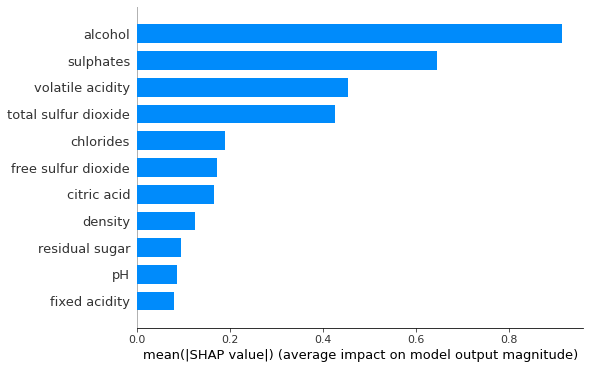

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

### Summary Plot

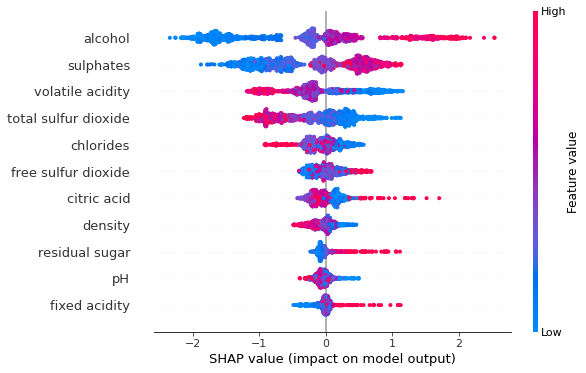

In [ ]:
shap.summary_plot(shap_values, X)

**End Webinar**